<a href="https://colab.research.google.com/github/esephaneli/fire-climate-analysis/blob/main/fireTurkish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [63]:
firesDf = pd.read_csv('viirs-snpp_2024_Turkey.csv')

In [64]:
tempDf = pd.read_csv('monthly.csv')

In [65]:
firesDf.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,41.34695,34.59604,311.92,0.67,0.73,2024-01-01,48,N,VIIRS,n,2,271.53,2.10,N,0
1,38.75340,26.95015,306.05,0.34,0.56,2024-01-01,50,N,VIIRS,n,2,282.02,1.66,N,2
2,38.73765,26.94738,296.16,0.34,0.56,2024-01-01,50,N,VIIRS,n,2,283.80,0.99,N,2
3,38.74358,26.94568,295.74,0.34,0.56,2024-01-01,50,N,VIIRS,n,2,279.87,0.99,N,2
4,37.09734,39.70560,333.62,0.42,0.38,2024-01-01,1030,N,VIIRS,n,2,289.57,3.65,D,0


In [66]:
tempDf.head()

,Source,Year,Mean
0,gcag,1850-01,-0.6746
1,gcag,1850-02,-0.3334
2,gcag,1850-03,-0.5913
3,gcag,1850-04,-0.5887
4,gcag,1850-05,-0.5088


In [67]:
firesDf["acq_date"] = pd.to_datetime(firesDf["acq_date"], errors="coerce")

In [68]:
firesDf["year"]  = firesDf["acq_date"].dt.year
firesDf["month"] = firesDf["acq_date"].dt.month

In [69]:
firesDf_2024 = firesDf[firesDf["year"] == 2024].copy()

In [70]:
monthly_fires = (
    firesDf_2024
    .groupby("month")["latitude"]
    .count()
    .reset_index()
    .rename(columns={"latitude": "fire_count"})
)

In [71]:
monthly_fires.head()

,month,fire_count
0,1,1060
1,2,1600
2,3,1337
3,4,1751
4,5,1461


In [72]:
tempDf["date"] = pd.to_datetime(tempDf["Year"], errors="coerce")

In [73]:
tempDf["year"]  = tempDf["date"].dt.year
tempDf["month"] = tempDf["date"].dt.month

In [74]:
tempDf_2024 = tempDf[tempDf["year"] == 2024].copy()

In [75]:
tempDf_2024 = tempDf_2024[["month", "Mean"]].rename(
    columns={"Mean": "temp_anomaly"})

In [76]:
tempDf_2024.head()

,month,temp_anomaly
3816,1,1.1516
3817,2,1.2902
3818,3,1.2515
3819,4,1.2053
3820,5,1.0745


In [77]:
merged_df = pd.merge(monthly_fires,tempDf_2024,on="month", how="left")

In [78]:
merged_df.head()

,month,fire_count,temp_anomaly
0,1,1060,1.1516
1,2,1600,1.2902
2,3,1337,1.2515
3,4,1751,1.2053
4,5,1461,1.0745


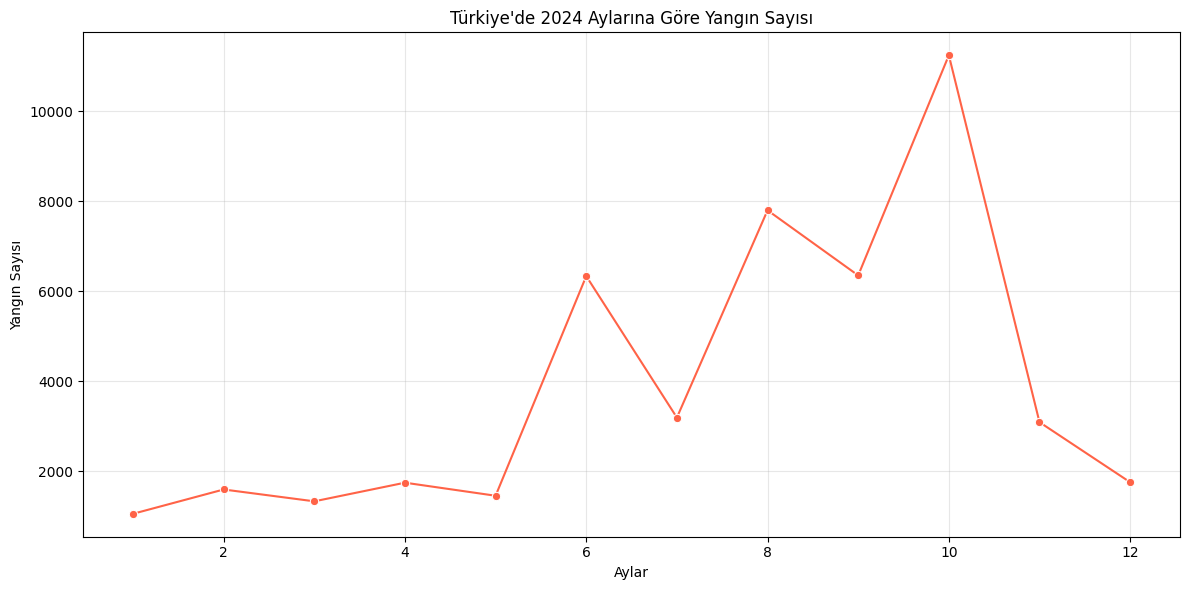

In [79]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_fires,x="month",y="fire_count",marker="o",color="tomato")
plt.title("Türkiye'de 2024 Aylarına Göre Yangın Sayısı")
plt.xlabel("Aylar")
plt.ylabel("Yangın Sayısı")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

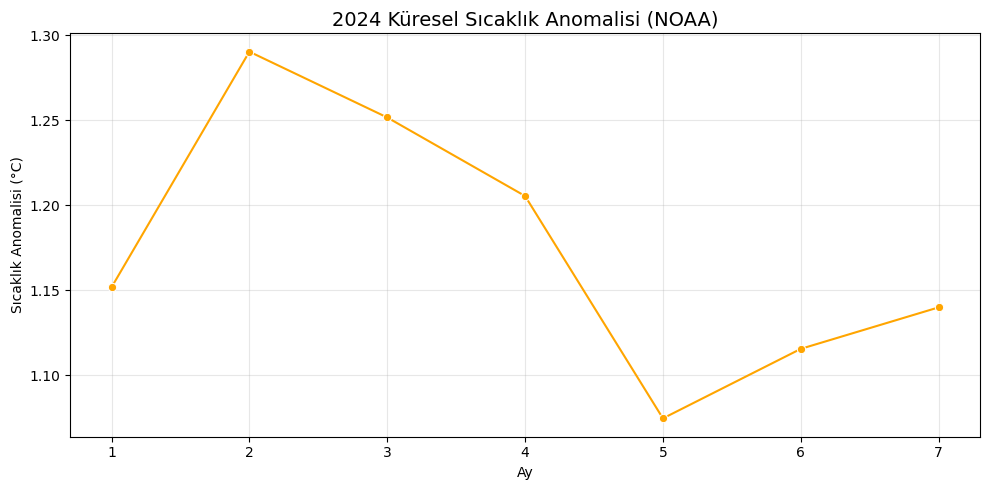

In [80]:
plt.figure(figsize=(10,5))
sns.lineplot(data=tempDf_2024,x="month",y="temp_anomaly",marker="o",color="orange")
plt.title("2024 Küresel Sıcaklık Anomalisi (NOAA)", fontsize=14)
plt.xlabel("Ay")
plt.ylabel("Sıcaklık Anomalisi (°C)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

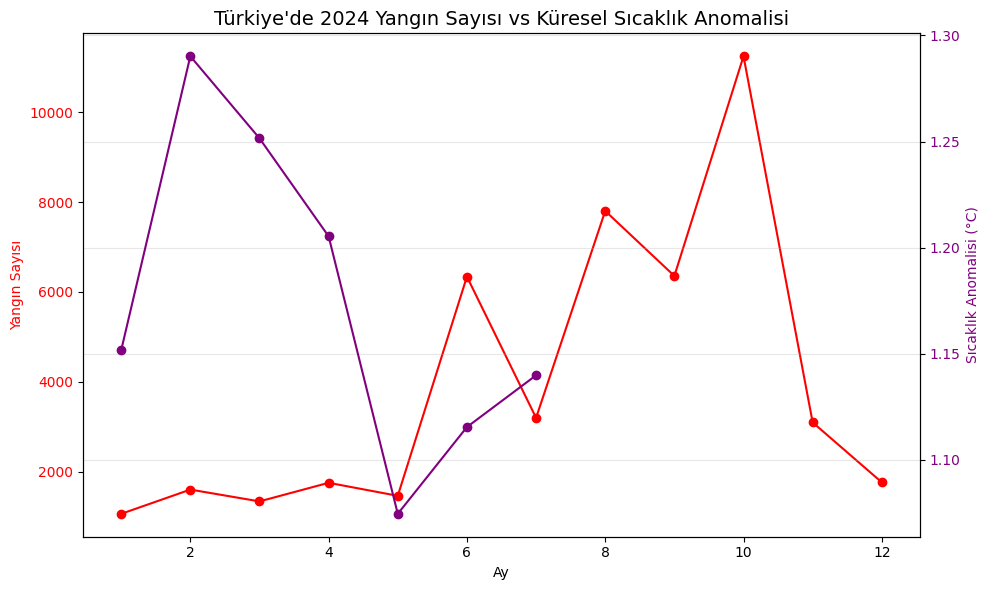

In [81]:
fig, ax1 = plt.subplots(figsize=(10,6))


ax1.set_xlabel("Ay")
ax1.set_ylabel("Yangın Sayısı", color="red")
ax1.plot(merged_df["month"], merged_df["fire_count"], color="red", marker="o", label="Yangın Sayısı")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.set_ylabel("Sıcaklık Anomalisi (°C)", color="purple")
ax2.plot(merged_df["month"], merged_df["temp_anomaly"], color="purple", marker="o", label="Sıcaklık Anomalisi")
ax2.tick_params(axis="y", labelcolor="purple")

plt.title("Türkiye'de 2024 Yangın Sayısı vs Küresel Sıcaklık Anomalisi",fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [82]:
m = folium.Map(location=[39, 35], zoom_start=5, tiles="CartoDB positron")
for _, row in firesDf_2024.sample(min(3000, len(firesDf_2024))).iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color="red",
        fill=True,
        fill_opacity=0.6).add_to(m)

In [83]:
m.save("fire_map.html")

In [90]:
merged_df.isnull().sum()

,0
month,0
fire_count,0
temp_anomaly,0


In [91]:
merged_df["temp_anomaly"].fillna(merged_df["temp_anomaly"].mean(), inplace=True)
merged_df["fire_count"].fillna(merged_df["fire_count"].mean(), inplace=True)

/tmp/ipython-input-1744736192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["temp_anomaly"].fillna(merged_df["temp_anomaly"].mean(), inplace=True)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [94]:
X = merged_df[["temp_anomaly"]]
y = merged_df["fire_count"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
r2 = model.score(X_test,y_test)
r2

-0.1548912355824814

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [99]:
X = merged_df[["temp_anomaly"]].values
y = merged_df["fire_count"].values

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

In [103]:
poly_model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [104]:
r2_poly = poly_model.score(X_test, y_test)

In [105]:
r2_poly

-0.026196210890900185

In [106]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = poly_model.predict(X_range)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


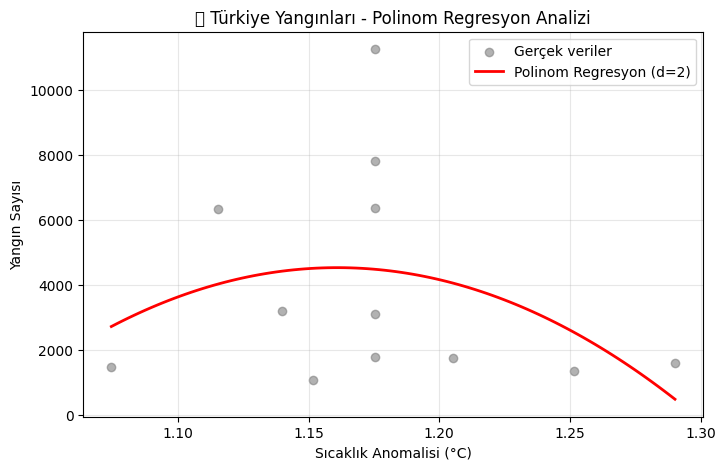

In [107]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="gray", alpha=0.6, label="Gerçek veriler")
plt.plot(X_range, y_pred, color="red", linewidth=2, label="Polinom Regresyon (d=2)")
plt.xlabel("Sıcaklık Anomalisi (°C)")
plt.ylabel("Yangın Sayısı")
plt.title("🔥 Türkiye Yangınları - Polinom Regresyon Analizi")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [108]:
for d in [2, 3, 4]:
    poly_model = Pipeline([
        ("poly", PolynomialFeatures(degree=d)),
        ("lin_reg", LinearRegression())
    ])
    poly_model.fit(X_train, y_train)
    r2 = poly_model.score(X_test, y_test)
    print(f"d={d} → R² = {r2:.3f}")

d=2 → R² = -0.026
d=3 → R² = -0.131
d=4 → R² = -0.127


In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
X = merged_df[["temp_anomaly", "month"]]
y = merged_df["fire_count"]

In [113]:
merged_df = merged_df.dropna(subset=["temp_anomaly", "fire_count"])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [115]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

In [116]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)

In [117]:
y_pred = rf_model.predict(X_test)

In [118]:
r2_rf = r2_score(y_test, y_pred)
r2_rf

0.5665355525869096

In [119]:
mae_rf = mean_absolute_error(y_test, y_pred)
mae_rf

2146.486666666667

In [120]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_rf

np.float64(2897.6592198646595)

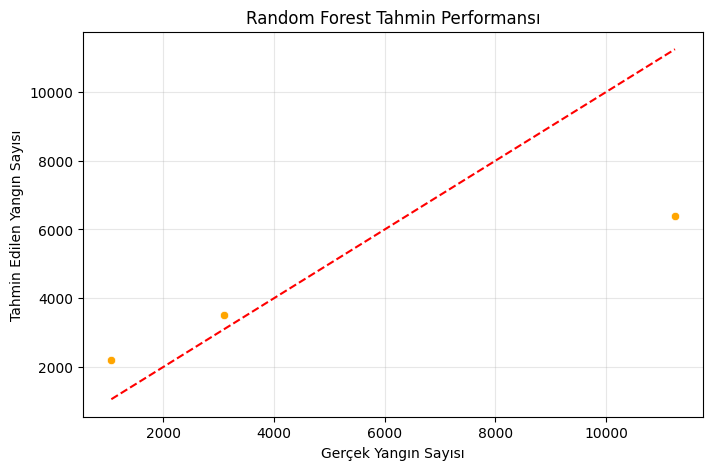

In [121]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gerçek Yangın Sayısı")
plt.ylabel("Tahmin Edilen Yangın Sayısı")
plt.title("Random Forest Tahmin Performansı")
plt.grid(alpha=0.3)
plt.show()

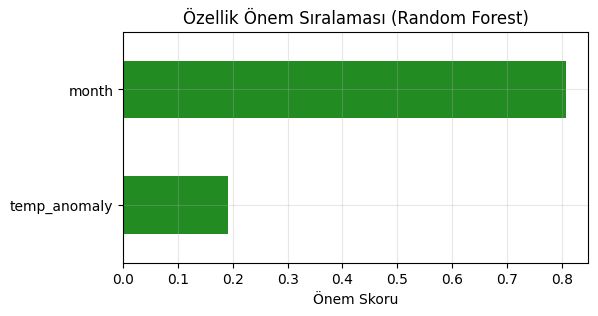

In [122]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind="barh", color="forestgreen", figsize=(6,3))
plt.title("Özellik Önem Sıralaması (Random Forest)")
plt.xlabel("Önem Skoru")
plt.grid(alpha=0.3)
plt.show()